<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Goals" data-toc-modified-id="Learning-Goals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning Goals</a></span></li><li><span><a href="#Time-Series-Models" data-toc-modified-id="Time-Series-Models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time Series Models</a></span><ul class="toc-item"><li><span><a href="#Chicago-Gun-Data" data-toc-modified-id="Chicago-Gun-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Chicago Gun Data</a></span><ul class="toc-item"><li><span><a href="#sklearn.model_selection.TimeSeriesSplit" data-toc-modified-id="sklearn.model_selection.TimeSeriesSplit-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span><code>sklearn.model_selection.TimeSeriesSplit</code></a></span></li></ul></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#The-Autoregressive-Model-(AR)" data-toc-modified-id="The-Autoregressive-Model-(AR)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>The Autoregressive Model (AR)</a></span><ul class="toc-item"><li><span><a href="#statsmodels.tsa.arima_model.ARIMA" data-toc-modified-id="statsmodels.tsa.arima_model.ARIMA-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span><a href="https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html" target="_blank"><code>statsmodels.tsa.arima_model.ARIMA</code></a></a></span></li><li><span><a href="#Sidebar:-Akaike-Information-Criterion" data-toc-modified-id="Sidebar:-Akaike-Information-Criterion-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Sidebar: Akaike Information Criterion</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Cross-Validation</a></span></li><li><span><a href="#Comparison-with-sklearn.linear_model.LinearRegression" data-toc-modified-id="Comparison-with-sklearn.linear_model.LinearRegression-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Comparison with <code>sklearn.linear_model.LinearRegression</code></a></span></li><li><span><a href="#Adding-a-Term" data-toc-modified-id="Adding-a-Term-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Adding a Term</a></span></li></ul></li><li><span><a href="#Moving-Average-Model-(MA)" data-toc-modified-id="Moving-Average-Model-(MA)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Moving Average Model (MA)</a></span></li><li><span><a href="#ARMA" data-toc-modified-id="ARMA-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>ARMA</a></span></li></ul></li><li><span><a href="#LEVEL-UPS" data-toc-modified-id="LEVEL-UPS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LEVEL UPS</a></span><ul class="toc-item"><li><span><a href="#ACF-and-PACF" data-toc-modified-id="ACF-and-PACF-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ACF and PACF</a></span><ul class="toc-item"><li><span><a href="#PACF" data-toc-modified-id="PACF-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>PACF</a></span></li><li><span><a href="#ACF" data-toc-modified-id="ACF-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>ACF</a></span></li></ul></li><li><span><a href="#Testing" data-toc-modified-id="Testing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Testing</a></span></li><li><span><a href="#SARIMA" data-toc-modified-id="SARIMA-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>SARIMA</a></span></li><li><span><a href="#Forecast" data-toc-modified-id="Forecast-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Forecast</a></span></li></ul></li></ul></div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Time Series Modeling</p>
</div>

Data Science Cohort Live NYC March 2023
<p>Phase 4: Topic 35</p>
<br>
<br>

<div align = "right">
<img src="images/flatiron-school-logo.png" align = "right" width="200"/>
</div>

# Learning Goals

- Build time-series models with `statsmodels`
- Cross-validate time-series models

# Time Series Models

In [1]:
from random import gauss as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import itertools

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


%matplotlib inline

In [2]:
def display_df(dftest):
    '''
    Display the output from a Dickey-Fuller test in a more readable format
    '''
    
    
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    display(dfoutput)
    
    print(f"The p-value associated with the Dickey-Fuller statistical test is {dfoutput['p-value']},")
    if dfoutput['p-value'] < 0.05:
        print(" so we can safely assume that the differenced data is stationary.")
    else:
        print(" so we cannot reject the null hypothesis that the differenced data is \
    not stationary.")

## Chicago Gun Data

Let's reimport our chicago gun crime data, and prepare it in the same manner as the last notebook.


In [3]:
ts = pd.read_csv('data/Gun_Crimes_Heat_Map.csv')
ts['Date'] = pd.to_datetime(ts.Date)
ts_minute = ts.groupby('Date').count()['ID']
daily_count = ts_minute.resample('D').sum()
daily_count = daily_count[daily_count < 90]

ts_dr = pd.date_range(daily_count.index[0], daily_count.index[-1])
ts_daily = np.empty(shape=len(ts_dr))
ts_daily = pd.Series(ts_daily)
ts_daily = ts_daily.reindex(ts_dr)
ts_daily = ts_daily.fillna(daily_count)
ts_daily = ts_daily.interpolate()

ts_weekly = ts_daily.resample('W').mean()

In [4]:
ts.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,9446834,HX100098,2014-01-01 00:02:00,072XX S MORGAN ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENTIAL YARD (FRONT/BACK),True,False,...,17.0,68,15,1170897.0,1856795.0,2014,02/10/2018 03:50:01 PM,41.762519,-87.649198,"(41.762519013, -87.64919809)"
1,9446765,HX100013,2014-01-01 00:03:00,064XX S ROCKWELL ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENTIAL YARD (FRONT/BACK),True,False,...,15.0,66,15,1160145.0,1861909.0,2014,02/10/2018 03:50:01 PM,41.776780,-87.688465,"(41.776780469, -87.688465418)"
2,9446921,HX100067,2014-01-01 00:04:00,048XX S PRAIRIE AVE,1460,WEAPONS VIOLATION,POSS FIREARM/AMMO:NO FOID CARD,APARTMENT,True,False,...,3.0,38,15,1178859.0,1872997.0,2014,02/04/2016 06:33:39 AM,41.806801,-87.619523,"(41.806801421, -87.61952336)"
3,9446783,HX100093,2014-01-01 00:05:00,011XX W 50TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,PARKING LOT/GARAGE(NON.RESID.),True,False,...,16.0,61,15,1169689.0,1871646.0,2014,02/10/2018 03:50:01 PM,41.803298,-87.653195,"(41.8032982, -87.653195042)"
4,9446811,HX100017,2014-01-01 00:05:00,031XX W WALNUT ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE PORCH/HALLWAY,True,False,...,27.0,27,15,1155344.0,1901461.0,2014,02/10/2018 03:50:01 PM,41.885414,-87.705005,"(41.885413516, -87.705005317)"


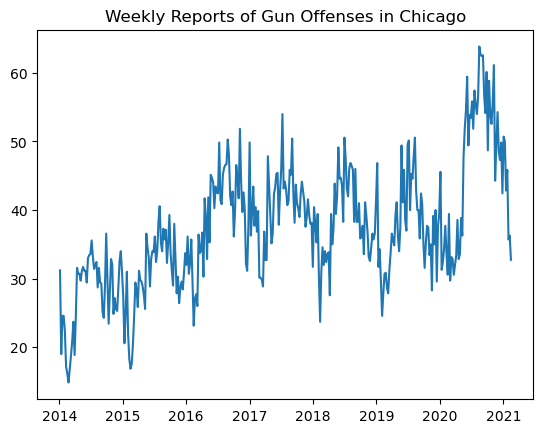

In [5]:
fig, ax = plt.subplots()
ax.plot(ts_weekly)
ax.set_title("Weekly Reports of Gun Offenses in Chicago");

The train-test split for a time series is a little different from what we are used to. Because **chronological order matters**, we cannot randomly sample points in our data. Instead, we cut off a portion of our data at the end, and reserve it as our test set.

In [6]:
# find the index which allows us to split off 20% of the data
cutoff = round(ts_weekly.shape[0]*0.8)
cutoff

298

In [7]:
# Define train and test sets according to the index found above
train = ts_weekly[:cutoff]

test = ts_weekly[cutoff:]

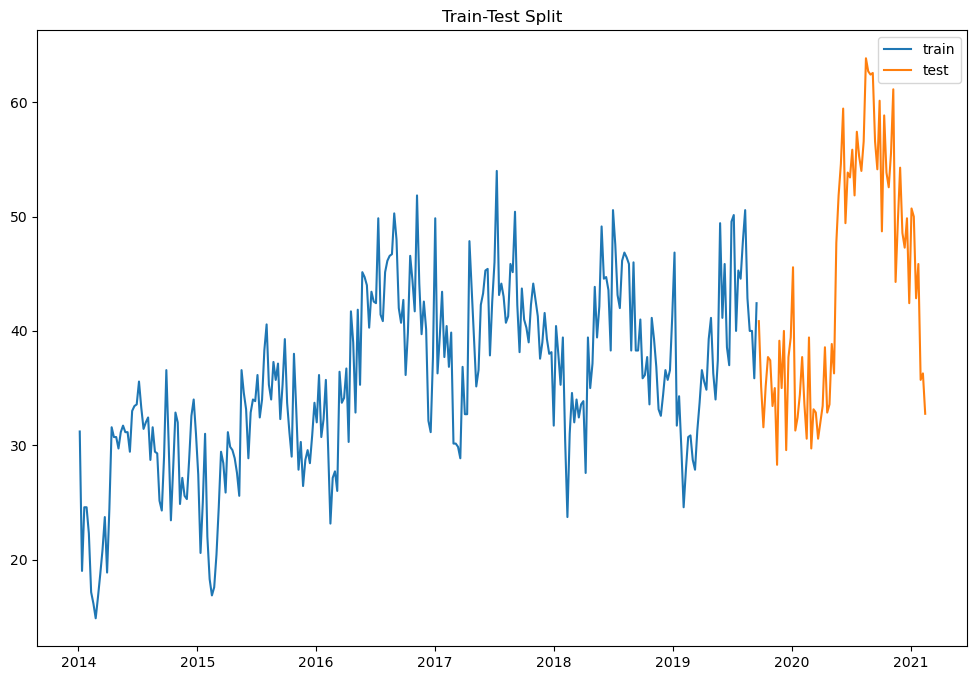

In [8]:
# Plot it!
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

We will now set aside our test set, and build our model on the train.

## Baseline

In [9]:
train

2014-01-05    31.200000
2014-01-12    19.000000
2014-01-19    24.571429
2014-01-26    24.571429
2014-02-02    22.285714
                ...    
2019-08-18    42.857143
2019-08-25    40.000000
2019-09-01    40.000000
2019-09-08    35.857143
2019-09-15    42.428571
Freq: W-SUN, Length: 298, dtype: float64

In [10]:
# we can perform this with the shift operator
# The prediction for the next day is the original series shifted to the future by one day.
naive = train.shift(1)
naive

2014-01-05          NaN
2014-01-12    31.200000
2014-01-19    19.000000
2014-01-26    24.571429
2014-02-02    24.571429
                ...    
2019-08-18    50.571429
2019-08-25    42.857143
2019-09-01    40.000000
2019-09-08    40.000000
2019-09-15    35.857143
Freq: W-SUN, Length: 298, dtype: float64

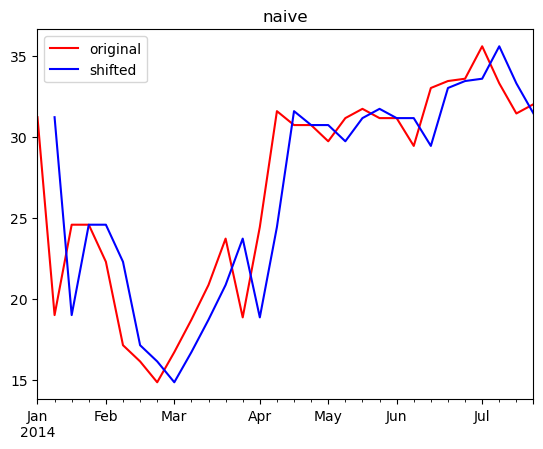

In [11]:
fig, ax = plt.subplots()

train[0:30].plot(ax=ax, c='r', label='original')
naive[0:30].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

For a baseline to compare our later models, lets calculate our **RMSE** for the naive model.

In [12]:
np.sqrt(mean_squared_error(train[1:], naive.dropna()))

4.774206044857893

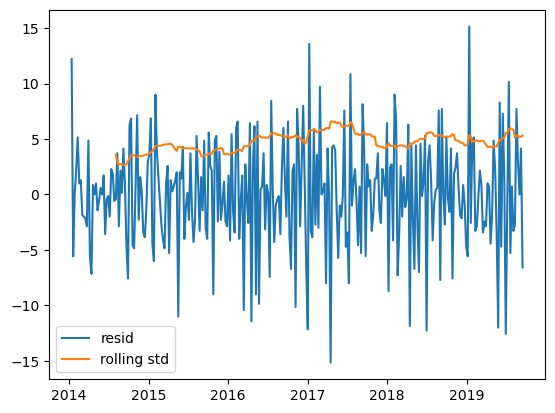

In [13]:
fig, ax = plt.subplots()
residuals = naive[1:] - train[1:]
ax.plot(residuals.index, residuals, label='resid')
ax.plot(residuals.index, residuals.rolling(30).std(), label='rolling std')
ax.legend();

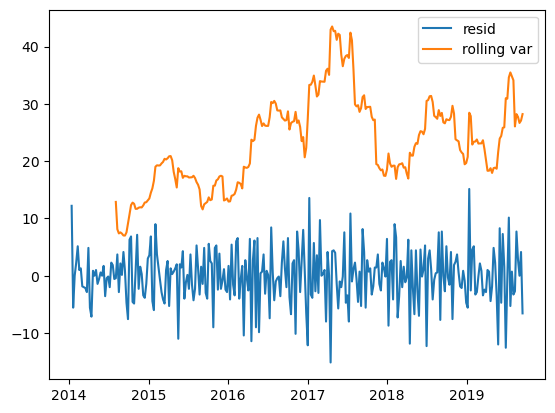

In [14]:
fig, ax = plt.subplots()
ax.plot(residuals.index, residuals, label='resid')
ax.plot(residuals.index, residuals.rolling(30).var(), label='rolling var')
ax.legend();

If we look at the rolling standard deviation of our errors, we can see that the performance of our model varies at different points in time.

That is a result of the trends in our data.

In the previous notebook, we were able to make our series **stationary** by differencing our data.

Visually, our differenced data looks *more* like white noise:

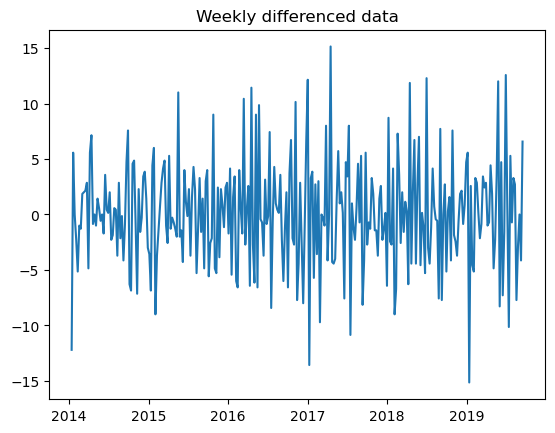

In [15]:
fig, ax = plt.subplots()
ax.plot(train.diff())
ax.set_title('Weekly differenced data');

By removing the trend from our data, we assume that our data's mean and variance are constant throughout.  But it is **not** just white noise.  If it were, our models could do no better than random predictions around the mean.  

Our task now is to find **more patterns** in the series.  

We will focus on the data points near to the point in question.  We can attempt to find patterns to how much influence previous points in the sequence have. 

If that made you think of regression, great! What we will be doing is assigning weights, like our betas, to previous points.

Let's make sure our data after differencing is stationary:

In [16]:
dftest = adfuller(train.diff()[1:])
display_df(dftest)

Test Statistic                -1.286619e+01
p-value                        4.989352e-24
#Lags Used                     3.000000e+00
Number of Observations Used    2.930000e+02
Critical Value (1%)           -3.452867e+00
Critical Value (5%)           -2.871455e+00
Critical Value (10%)          -2.572053e+00
dtype: float64

The p-value associated with the Dickey-Fuller statistical test is 4.989352226039248e-24,
 so we can safely assume that the differenced data is stationary.


## The Autoregressive Model (AR)

### [`statsmodels.tsa.arima_model.ARIMA`](https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html)

This model is really a compound of two simpler models. This ARIMA class takes a triple of values as its "order". We'll explain this shortly, but for now just note that the first member of the triple, i.e. the **p** variable of the order (p, d, q), represents the AR term. So for a first-order AR model, we'll put a 1 there.

The 1 in the second place of the order will do our differencing for us.

In [17]:
# ar_1 model with differencing
ar_1 = ARIMA(train, order=(1, 1, 0)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
ar_1.predict(typ='levels')

2014-01-05     0.000000
2014-01-12    31.199795
2014-01-19    22.517714
2014-01-26    22.964978
2014-02-02    24.571429
                ...    
2019-08-18    49.788799
2019-08-25    45.081458
2019-09-01    40.823821
2019-09-08    40.000000
2019-09-15    37.051683
Freq: W-SUN, Name: predicted_mean, Length: 298, dtype: float64

The ARIMA class comes with a nice summary table.  

[This](https://analyzingalpha.com/interpret-arima-results/) does an excellent job going through the table and explaining the bits and bobs. 

In [18]:
# Summary
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  298
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -873.148
Date:                Thu, 16 Mar 2023   AIC                           1750.296
Time:                        11:17:34   BIC                           1757.683
Sample:                    01-05-2014   HQIC                          1753.253
                         - 09-15-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2883      0.056     -5.184      0.000      -0.397      -0.179
sigma2        20.9389      1.554     13.478      0.000      17.894      23.984
===================================================================================
Ljung-Box (L1) (Q):                   2.10   Jarque-Bera (JB):                 5.01
Prob(Q):                              0.15   Prob(JB):                         0.08
Heteroskedasticity (H):               1.42   Skew:                             0.23
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
ar_1.aic

1750.2955165085114

### Sidebar: Akaike Information Criterion

But, as you may notice, the output does not include RMSE.

It does include [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion). A better model has a lower AIC.

Let's compare the first order autoregressive model to our Random Walk.

In [20]:
random_walk_model = ARIMA(train, order=(0, 1, 0)).fit()
random_walk_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  298
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -885.703
Date:                Thu, 16 Mar 2023   AIC                           1773.407
Time:                        11:17:34   BIC                           1777.100
Sample:                    01-05-2014   HQIC                          1774.885
                         - 09-15-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        22.7930      1.677     13.589      0.000      19.506      26.080
===================================================================================
Ljung-Box (L1) (Q):                  23.73   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.00   Prob(JB):                         0.16
Heteroskedasticity (H):               1.61   Skew:                             0.13
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
print(f'Random Walk AIC: {random_walk_model.aic}')
print(f'AR(1, 1, 0) AIC: {ar_1.aic}' )

Random Walk AIC: 1773.4067346708448
AR(1, 1, 0) AIC: 1750.2955165085114


Our AIC for the AR(1) model is lower than the random walk, indicating improvement.  

Let's also check the RMSE.

In [22]:
y_hat_ar1 = ar_1.predict(typ='levels')
ar1_rmse = np.sqrt(mean_squared_error(train, y_hat_ar1))

In [23]:
y_hat_rw = random_walk_model.predict(typ='levels')
rw_rmse = np.sqrt(mean_squared_error(train, y_hat_rw))

In [24]:
print(f'Random Walk RMSE: {rw_rmse}')
print(f'AR1 RMSE:         {ar1_rmse}')

Random Walk RMSE: 5.097365380006156
AR1 RMSE:         4.9169947048017475


RMSE is lower as well.

### Cross-Validation

For this it will help to have our normal integer index.

In [25]:
train.index

DatetimeIndex(['2014-01-05', '2014-01-12', '2014-01-19', '2014-01-26',
               '2014-02-02', '2014-02-09', '2014-02-16', '2014-02-23',
               '2014-03-02', '2014-03-09',
               ...
               '2019-07-14', '2019-07-21', '2019-07-28', '2019-08-04',
               '2019-08-11', '2019-08-18', '2019-08-25', '2019-09-01',
               '2019-09-08', '2019-09-15'],
              dtype='datetime64[ns]', length=298, freq='W-SUN')

In [26]:
train_with_ind = train.reset_index()
train_with_ind.head()

,index,0
0,2014-01-05,31.200000
1,2014-01-12,19.000000
2,2014-01-19,24.571429
3,2014-01-26,24.571429
4,2014-02-02,22.285714


### `sklearn.model_selection.TimeSeriesSplit`

Let's also use `sklearn`'s in-built class to prepare our model for a kind of cross-validation:

In [27]:
# TimeSeriesSplit
split = TimeSeriesSplit()

In [28]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

6.297323003276929
12.525959199635869
5.5553391668318195
7.3201044191704945
6.469898485356731


### Comparison with `sklearn.linear_model.LinearRegression`

Autoregression, as we said before, is a regression of a time series on lagged values of itself.  

From the summary, we see the coefficient of the 1st lag:

In [29]:
ar_1.arparams

array([-0.28833721])

We come close to reproducing this coefficient with linear regression, with slight differences due to how statsmodels performs the regression. 

In [30]:
lr = LinearRegression()
lr.fit(np.array(train.diff().shift(1).dropna()).reshape(-1, 1), train[1:].diff().dropna())
print(lr.coef_)

[-0.28299508]


### Adding a Term

We can also factor in more than just the most recent point.
$$\large y_{t} = \phi_{0} + \phi_{1}y_{t-1} + \phi_{2}y_{t-2}+ \varepsilon_{t}$$

We refer to the order of our AR model by the number of lags back we go.  The above formula refers to an **AR(2)** model. We put a 2 in the p position of the ARIMA class order.

In [31]:
ar_2 = ARIMA(train, order=(2, 1, 0)).fit()

ar_2.predict(typ='levels')

2014-01-05     0.000000
2014-01-12    31.199797
2014-01-19    22.481150
2014-01-26    26.323162
2014-02-02    22.816761
                ...    
2019-08-18    48.518157
2019-08-25    44.896898
2019-09-01    43.501611
2019-09-08    40.899830
2019-09-15    37.411646
Freq: W-SUN, Name: predicted_mean, Length: 298, dtype: float64

In [32]:
print(random_walk_model.aic)
print(ar_1.aic)
print(ar_2.aic)

1773.4067346708448
1750.2955165085114
1722.0181960795026


In [33]:
y_hat_ar1 = ar_2.predict(typ='levels')
ar2_rmse = np.sqrt(mean_squared_error(train, y_hat_ar1))

In [34]:
print(f'Random Walk RMSE: {rw_rmse}')
print(f'AR1 RMSE:         {ar1_rmse}')
print(f'AR2 RMSE:         {ar2_rmse}')

Random Walk RMSE: 5.097365380006156
AR1 RMSE:         4.9169947048017475
AR2 RMSE:         4.710330730821864


Our AIC improves with more lagged terms.

In [35]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(2, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

5.7358784057038354
12.47902836732941
6.18888658582505
6.741524259768939
6.286222565264069


This is better on four out of five validation tests compared to the one-term model.

## Moving Average Model (MA)

The next type of model is based on error.  The idea behind the moving average model is to make a prediction based on how far off we were the day before.

$$\large Y_t = \mu +\epsilon_t + \theta\epsilon_{t-1}$$

The moving average model works like this. We make a prediction, see how far off we were, then adjust our next prediction by a factor of how far off our pervious prediction was.

In our ARIMA model, the q term of our order (p, d, q) refers to the MA component. To use one lagged error, we put 1 in the q position.

In [36]:
ma_1 = ARIMA(train, order=(0, 0, 1)).fit()
y_hat = ma_1.predict(typ='levels')
y_hat

2014-01-05    35.658933
2014-01-12    33.580932
2014-01-19    26.978507
2014-01-26    34.106432
2014-02-02    29.305679
                ...    
2019-08-18    40.795779
2019-08-25    37.069285
2019-09-01    37.664081
2019-09-08    37.257131
2019-09-15    34.701084
Freq: W-SUN, Name: predicted_mean, Length: 298, dtype: float64

In [37]:
ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  298
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -936.689
Date:                Thu, 16 Mar 2023   AIC                           1879.379
Time:                        11:17:35   BIC                           1890.470
Sample:                    01-05-2014   HQIC                          1883.819
                         - 09-15-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6589      0.560     63.726      0.000      34.562      36.756
ma.L1          0.6842      0.045     15.182      0.000       0.596       0.773
sigma2        31.3906      2.702     11.620      0.000      26.096      36.685
===================================================================================
Ljung-Box (L1) (Q):                  24.44   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.00   Prob(JB):                         0.47
Heteroskedasticity (H):               0.84   Skew:                             0.15
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Let's look at the 1st order MA model with a 1st order difference

In [38]:
ma_1 = ARIMA(train, order=(0, 1, 1)).fit()
print(f'Random Walk AIC: {random_walk_model.aic}')
print(f'AR1 AIC:         {ar_1.aic}')
print(f'AR2 AIC:         {ar_2.aic}')
print(f'MA1 AIC:         {ma_1.aic}')


Random Walk AIC: 1773.4067346708448
AR1 AIC:         1750.2955165085114
AR2 AIC:         1722.0181960795026
MA1 AIC:         1724.1691361667588


In [39]:
y_hat_ar1 = ma_1.predict(typ='levels')
ma1_rmse = np.sqrt(mean_squared_error(train, y_hat_ar1))

In [40]:
print(f'Random Walk RMSE: {rw_rmse}')
print(f'AR1 RMSE:         {ar1_rmse}')
print(f'AR2 RMSE:         {ar2_rmse}')
print(f'MA1 RMSE:         {ma1_rmse}')

Random Walk RMSE: 5.097365380006156
AR1 RMSE:         4.9169947048017475
AR2 RMSE:         4.710330730821864
MA1 RMSE:         4.740463932417678


It performs better than our AR(1) model and comparably to our AR(2) model.

In [41]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(0, 1, 1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

5.91778773124701
12.40685102655001
6.039074153543992
6.640948760853445
6.2546342596660764


Just like our AR models, we can lag back as far as we want. Our MA(2) model would use the past two lagged terms:

$$\large Y_t = \mu +\epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2}$$

and our MA term would be two.

In [42]:
ma_2 = ARIMA(train, order=(0, 1, 2)).fit()
y_hat = ma_2.predict(typ='levels')
y_hat

2014-01-05     0.000000
2014-01-12    31.199814
2014-01-19    22.258143
2014-01-26    25.849721
2014-02-02    24.629102
                ...    
2019-08-18    48.131032
2019-08-25    44.144643
2019-09-01    42.741337
2019-09-08    41.946311
2019-09-15    38.869027
Freq: W-SUN, Name: predicted_mean, Length: 298, dtype: float64

In [43]:
print(random_walk_model.aic)
print(ar_1.aic)
print(ar_2.aic)
print(ma_1.aic)
print(ma_2.aic)

1773.4067346708448
1750.2955165085114
1722.0181960795026
1724.1691361667588
1716.9613487850058


In [44]:
y_hat_ar1 = ma_2.predict(typ='levels')
ma2_rmse = np.sqrt(mean_squared_error(train, y_hat_ar1))

In [45]:
print(f'Random Walk RMSE: {rw_rmse}')
print(f'AR1 RMSE:         {ar1_rmse}')
print(f'AR2 RMSE:         {ar2_rmse}')
print(f'MA1 RMSE:         {ma1_rmse}')
print(f'MA2 RMSE:         {ma2_rmse}')

Random Walk RMSE: 5.097365380006156
AR1 RMSE:         4.9169947048017475
AR2 RMSE:         4.710330730821864
MA1 RMSE:         4.740463932417678
MA2 RMSE:         4.676009695927035


In [46]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(0, 1, 2)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

5.775851715126704
12.178450129851507
6.195522220195497
6.531436397876239
6.245522240158328


## ARMA

We don't have to limit ourselves to just AR or MA.  We can use both AR terms and MA terms.

for example, an ARMA(2, 2) model is given by:

 $$\large Y_t = \mu+\phi_1 Y_{t-1}+\phi_2 Y_{t-2}+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+\epsilon_t$$

In [47]:
arma_22 = ARIMA(train, order=(2, 1, 2)).fit()

In [48]:
print(random_walk_model.aic)
print(ar_1.aic)
print(ar_2.aic)
print(ma_1.aic)
print(ma_2.aic)
print(arma_22.aic)

1773.4067346708448
1750.2955165085114
1722.0181960795026
1724.1691361667588
1716.9613487850058
1715.9771242258234


In [49]:
def find_rmse(model, train_data=train):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))

In [50]:
print(f'Random Walk RMSE: {find_rmse(random_walk_model)}')
print(f'AR1 RMSE:         {find_rmse(ar_1)}')
print(f'AR2 RMSE:         {find_rmse(ar_2)}')
print(f'MA1 RMSE:         {find_rmse(ma_1)}')
print(f'MA2 RMSE:         {find_rmse(ma_2)}')
print(f'MA22 RMSE:        {find_rmse(arma_22)}')

Random Walk RMSE: 5.097365380006156
AR1 RMSE:         4.9169947048017475
AR2 RMSE:         4.710330730821864
MA1 RMSE:         4.740463932417678
MA2 RMSE:         4.676009695927035
MA22 RMSE:        4.644265190456027


In [51]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(2, 1, 2)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

5.676353671788999
13.119506447762086
6.343341226834495
6.503658999236649
6.233574278733146


In [52]:
def find_rmse_test(model, test_data=test):
    y_hat = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
    return np.sqrt(mean_squared_error(test_data, y_hat))

In [53]:
print(find_rmse_test(random_walk_model))
print(find_rmse_test(ar_1))
print(find_rmse_test(ar_2))
print(find_rmse_test(ma_1))
print(find_rmse_test(ma_2))
print(find_rmse_test(arma_22))

10.527048559730781
10.884018931636644
11.023282810554141
11.012715929812659
10.729331193501022
10.834881106964444


# LEVEL UPS

## ACF and PACF

We have been able to reduce our AIC by chance, adding fairly random p, d, and q terms.

But we have tools to help guide us in these decisions: the autocorrelation and partial autocorrelation functions.

### [Identifying AR and MA using ACF and PACF Plots](https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8)

### PACF

In general, a partial correlation is a **conditional correlation**. It is the  amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags. If $Y_t$ is correlated with $Y_{t-1}$, and $Y_{t-1}$ is equally correlated with $Y_{t-2}$, then we should also expect to find correlation between $Y_t$ and $Y_{t-2}$. Thus, the correlation at lag 1 "propagates" to lag 2 and presumably to higher-order lags. The partial autocorrelation at lag 2 is therefore the difference between the actual correlation at lag 2 and the expected correlation due to the propagation of correlation at lag 1.

/Users/jamesbenasuli/miniforge3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


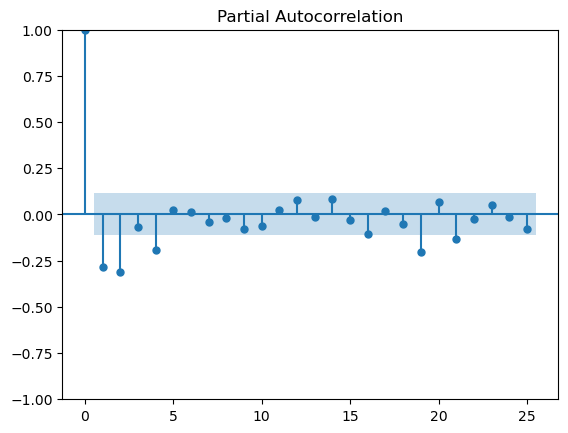

In [54]:
plot_pacf(train.diff().dropna());

The shaded area of the graph is the confidence interval. When the correlation drops into the shaded area, that means there is no longer statistically significant correlation between lags.

For an AR process, we run a linear regression on lags according to the order of the AR process. The coefficients calculated factor in the influence of the other variables.   

Since the PACF shows the direct effect of previous lags, it helps us choose AR terms.  If there is a significant positive value at a lag, consider adding an AR term according to the number that you see.

Some rules of thumb: 

    - A sharp drop after lag "k" suggests an AR-k model.
    - A gradual decline suggests an MA.

### ACF

The autocorrelation plot of our time series is simply a version of the correlation plots we used in linear regression.  Our features this time are prior points in the time series, or the **lags**. 

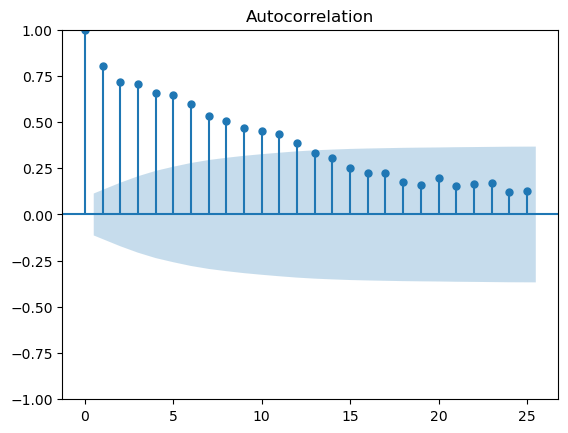

In [55]:
# Original data

plot_acf(train);

The above autocorrelation shows that there is correlation between lags up to about 12 weeks back.  

When Looking at the ACF graph for the original data, we see a strong persistent correlation with higher order lags. This is evidence that we should take a **first difference** of the data to remove this autocorrelation.

This makes sense, since we are trying to capture the effect of recent lags in our ARMA models, and with high correlation between distant lags, our models will not come close to the true process.

Generally, we use an ACF to predict MA terms.
Moving Average models are using the error terms of the predictions to calculate the next value.  This means that the algorithm does not incorporate the direct effect of the previous value. It models what are sometimes called **impulses** or **shocks** whose effect accounts for the propogation of correlation from one lag to the other. 

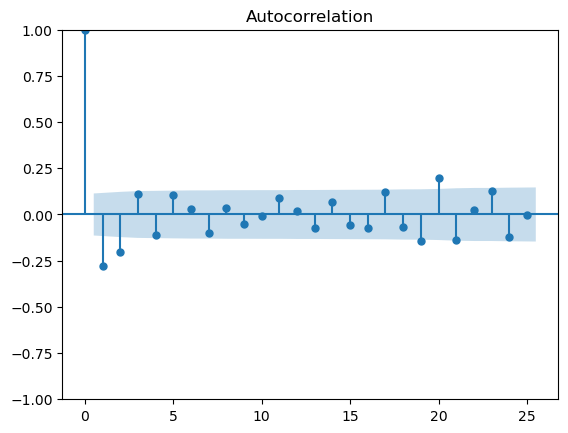

In [56]:
plot_acf(train.diff().dropna());

This autocorrelation plot can now be used to get an idea of a potential MA term.  Our differenced series shows negative significant correlation at a lag of 1, which suggests adding 1 MA term. There is also a statistically significant 2nd term, so adding another MA is another possibility.


> If the ACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag at which the ACF cuts off is the indicated number of MA terms. [Duke](https://people.duke.edu/~rnau/411arim3.htm#signatures)

Rule of thumb:
    
  - If the autocorrelation shows negative correlation at the first lag, try adding MA terms.
    
    

![alt text](images/armaguidelines.png)

The plots above suggest that we should try a 1st order differenced MA(1) or MA(2) model on our weekly gun offense data.

This aligns with our AIC scores from above.

The ACF can be used to identify the possible structure of time series data. That can be tricky going forward as there often isn’t a single clear-cut interpretation of a sample autocorrelation function.

Let's plot our training predictions, using an ARIMA model with order (1, 1, 2).

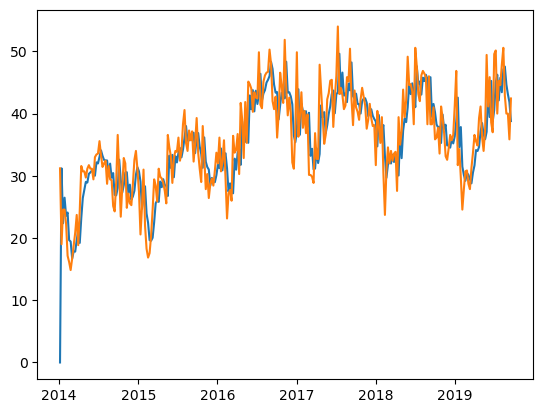

In [57]:
aa_model = ARIMA(train, order=(1, 1, 2)).fit()
y_hat_train = aa_model.predict(typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_train)
ax.plot(train);

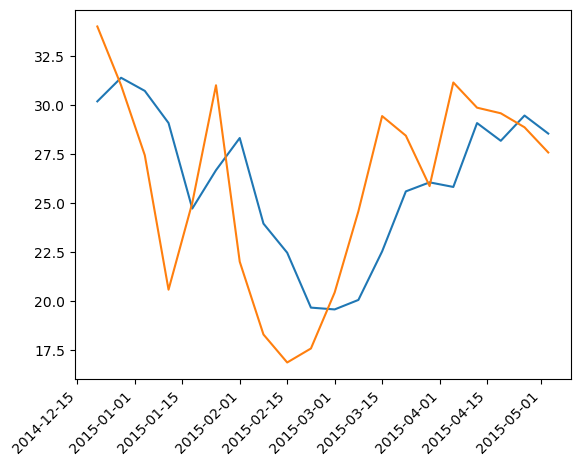

In [58]:
# Let's zoom in:

fig, ax = plt.subplots()
ax.plot(y_hat_train[50:70])
ax.plot(train[50:70])
plt.xticks(rotation = 45, ha='right');

In [59]:
aa_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  298
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -853.009
Date:                Thu, 16 Mar 2023   AIC                           1714.019
Time:                        11:17:35   BIC                           1728.794
Sample:                    01-05-2014   HQIC                          1719.934
                         - 09-15-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4760      0.169     -2.816      0.005      -0.807      -0.145
ma.L1          0.0679      0.159      0.425      0.671      -0.245       0.380
ma.L2         -0.4418      0.081     -5.437      0.000      -0.601      -0.283
sigma2        18.2629      1.370     13.329      0.000      15.577      20.948
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.12
Prob(Q):                              0.98   Prob(JB):                         0.08
Heteroskedasticity (H):               1.39   Skew:                             0.24
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Testing

Now that we have chosen our parameters, let's try our model on the test set.

In [60]:
test

2019-09-22    40.857143
2019-09-29    35.142857
2019-10-06    31.571429
2019-10-13    35.142857
2019-10-20    37.714286
                ...    
2021-01-17    42.857143
2021-01-24    45.857143
2021-01-31    35.714286
2021-02-07    36.285714
2021-02-14    32.750000
Freq: W-SUN, Length: 74, dtype: float64

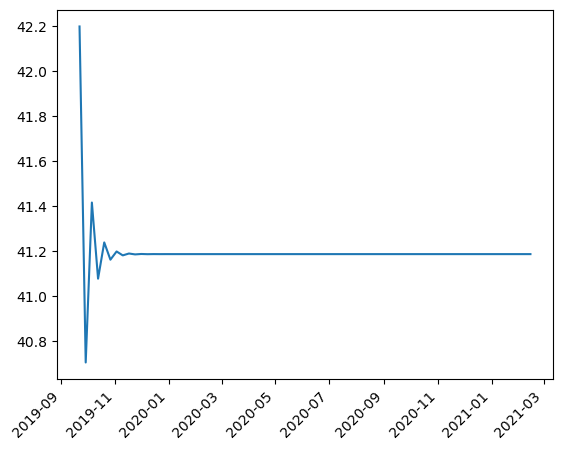

In [61]:
y_hat_test = aa_model.predict(start=test.index[0], end=test.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_test)
plt.xticks(rotation = 45, ha='right');

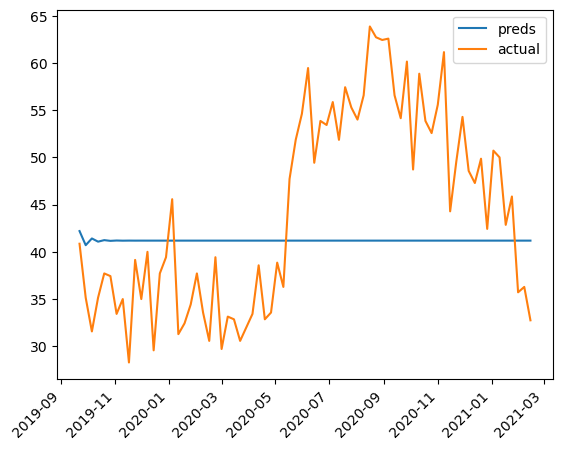

In [62]:
fig, ax = plt.subplots()
ax.plot(y_hat_test, label ='preds')
ax.plot(test, label ='actual')
plt.xticks(rotation = 45, ha='right')



ax.legend();

In [63]:
np.sqrt(mean_squared_error(test, y_hat_test))

10.815601427126477

Our predictions on the test set certainly leave something to be desired.  

Let's take another look at our autocorrelation function of the original series.

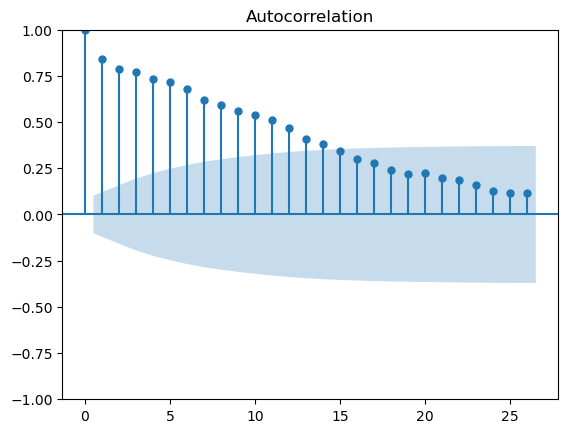

In [64]:
plot_acf(ts_weekly);

Let's increase the lags

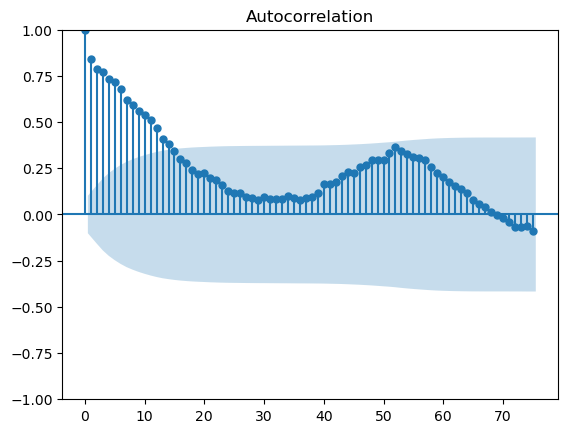

In [65]:
plot_acf(ts_weekly, lags=75);

There seems to be a wave of correlation at around 50 lags.
What is going on?

## SARIMA

Looks like we may have some other forms of seasonality.  Luckily, we have SARIMA, which stands for Seasonal Auto Regressive Integrated Moving Average.  That is a lot.  The `statsmodels` package is actually called SARIMAX.  The X stands for exogenous, and we are only dealing with endogenous variables, but we can use this class.

A seasonal ARIMA model is classified as an **ARIMA(p,d,q)x(P,D,Q)** model, 

    **p** = number of autoregressive (AR) terms 
    **d** = number of differences 
    **q** = number of moving average (MA) terms
     
    **P** = number of seasonal autoregressive (SAR) terms 
    **D** = number of seasonal differences 
    **Q** = number of seasonal moving average (SMA) terms

I.e. P and Q specify the number of seasons to include.

In [66]:
p = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 1, 0, 52)
SARIMAX: (0, 1, 0) x (1, 1, 1, 52)
SARIMAX: (0, 1, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 1) x (0, 1, 1, 52)
SARIMAX: (0, 1, 1) x (1, 1, 0, 52)
SARIMAX: (0, 1, 1) x (1, 1, 1, 52)
SARIMAX: (1, 1, 0) x (0, 1, 0, 52)
SARIMAX: (1, 1, 0) x (0, 1, 1, 52)
SARIMAX: (1, 1, 0) x (1, 1, 0, 52)
SARIMAX: (1, 1, 0) x (1, 1, 1, 52)
SARIMAX: (1, 1, 1) x (0, 1, 0, 52)
SARIMAX: (1, 1, 1) x (0, 1, 1, 52)
SARIMAX: (1, 1, 1) x (1, 1, 0, 52)
SARIMAX: (1, 1, 1) x (1, 1, 1, 52)


In [67]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(train,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit(disp=-1)
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('Oops!')
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 52) - AIC:1576.878829149863
ARIMA(0, 1, 0)x(0, 1, 1, 52) - AIC:1204.4985892397563
ARIMA(0, 1, 0)x(1, 1, 0, 52) - AIC:1225.469705290862
ARIMA(0, 1, 0)x(1, 1, 1, 52) - AIC:1207.6699611049257
ARIMA(0, 1, 1)x(0, 1, 0, 52) - AIC:1481.758765664027
ARIMA(0, 1, 1)x(0, 1, 1, 52) - AIC:1129.1627382521083
ARIMA(0, 1, 1)x(1, 1, 0, 52) - AIC:1160.7640473299416
ARIMA(0, 1, 1)x(1, 1, 1, 52) - AIC:1134.7342390437016
ARIMA(1, 1, 0)x(0, 1, 0, 52) - AIC:1535.5697927078531
ARIMA(1, 1, 0)x(0, 1, 1, 52) - AIC:1180.5485531133352
ARIMA(1, 1, 0)x(1, 1, 0, 52) - AIC:1189.3533353045755
ARIMA(1, 1, 0)x(1, 1, 1, 52) - AIC:1182.9655873155616
ARIMA(1, 1, 1)x(0, 1, 0, 52) - AIC:1476.6008134081294
ARIMA(1, 1, 1)x(0, 1, 1, 52) - AIC:1124.4148822371972
ARIMA(1, 1, 1)x(1, 1, 0, 52) - AIC:1144.5347878337652
ARIMA(1, 1, 1)x(1, 1, 1, 52) - AIC:1129.8052126265402


Let's try the third from the bottom, ARIMA(1, 1, 1)x(0, 1, 1, 52).

In [68]:
sari_mod =SARIMAX(train,
                  order=(1, 1, 1),
                  seasonal_order=(0, 1, 1, 52),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit(disp=-1)

In [69]:
for train_ind, val_ind in split.split(train_with_ind):
    sarimax = SARIMAX(endog=train_with_ind.iloc[train_ind, -1],
                      order=(1, 1, 1),
                     seasonal_order=(0, 1, 1, 52),
                     enforce_stationarity=False,
                     enforce_invertibility=False).fit(disp=-1)
    preds = sarimax.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

/Users/jamesbenasuli/miniforge3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/jamesbenasuli/miniforge3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


7.574548012434134


/Users/jamesbenasuli/miniforge3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


12.036675604261255


/Users/jamesbenasuli/miniforge3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


8.972230404741815


/Users/jamesbenasuli/miniforge3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


5.155202686681803


/Users/jamesbenasuli/miniforge3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4.7935080892614215


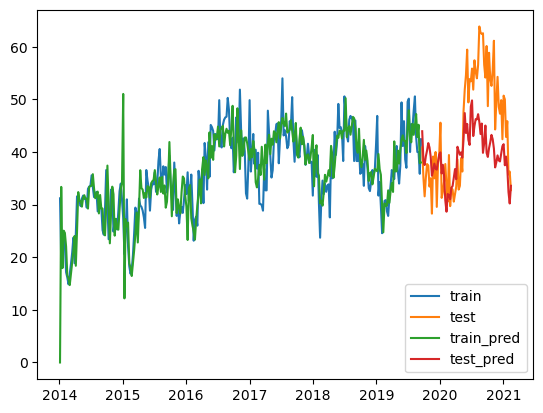

In [70]:
y_hat_train = sari_mod.predict(typ='levels')
y_hat_test = sari_mod.predict(start=test.index[0], end=test.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

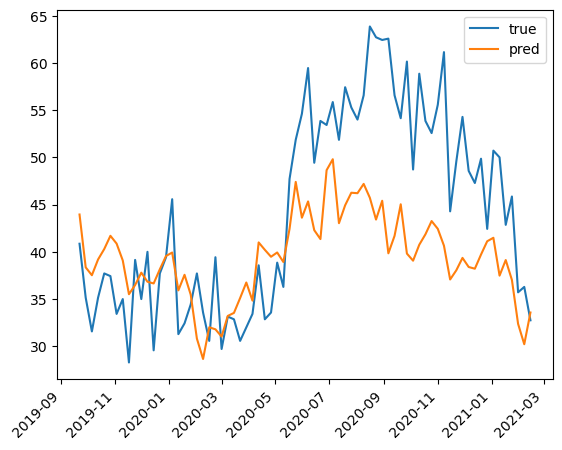

In [71]:
# Let's zoom in on test
fig, ax = plt.subplots()

ax.plot(test, label='true')
ax.plot(y_hat_test, label='pred')
plt.xticks(rotation = 45, ha='right');


plt.legend();

In [72]:
np.sqrt(mean_squared_error(test, y_hat_test))

9.233629883494439

## Forecast

Lastly, let's predict into the future.

To do so, we'll refit to our entire training set.

In [73]:
sari_mod = SARIMAX(ts_weekly,
                  order=(1, 1, 1),
                  seasonal_order=(0, 1, 1, 52),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit(disp=-1)

In [74]:
# out of sample
forecast = sari_mod.forecast(steps=52)

In [75]:
forecast

2021-02-21    39.696115
2021-02-28    37.286602
2021-03-07    39.990303
2021-03-14    40.142992
2021-03-21    40.622192
2021-03-28    42.226455
2021-04-04    41.253482
2021-04-11    47.146287
2021-04-18    44.977634
2021-04-25    44.595802
2021-05-02    46.410819
2021-05-09    45.027377
2021-05-16    50.690880
2021-05-23    55.319613
2021-05-30    53.377535
2021-06-06    55.936024
2021-06-13    51.046158
2021-06-20    51.601374
2021-06-27    56.670617
2021-07-04    58.181718
2021-07-11    52.228993
2021-07-18    55.109302
2021-07-25    55.501792
2021-08-01    55.057278
2021-08-08    56.464818
2021-08-15    57.460806
2021-08-22    55.514542
2021-08-29    56.848214
2021-09-05    52.859784
2021-09-12    52.530151
2021-09-19    53.691494
2021-09-26    51.518977
2021-10-03    47.262023
2021-10-10    51.660500
2021-10-17    51.443357
2021-10-24    51.710133
2021-10-31    51.274699
2021-11-07    52.206658
2021-11-14    44.357206
2021-11-21    48.538816
2021-11-28    49.665389
2021-12-05    48

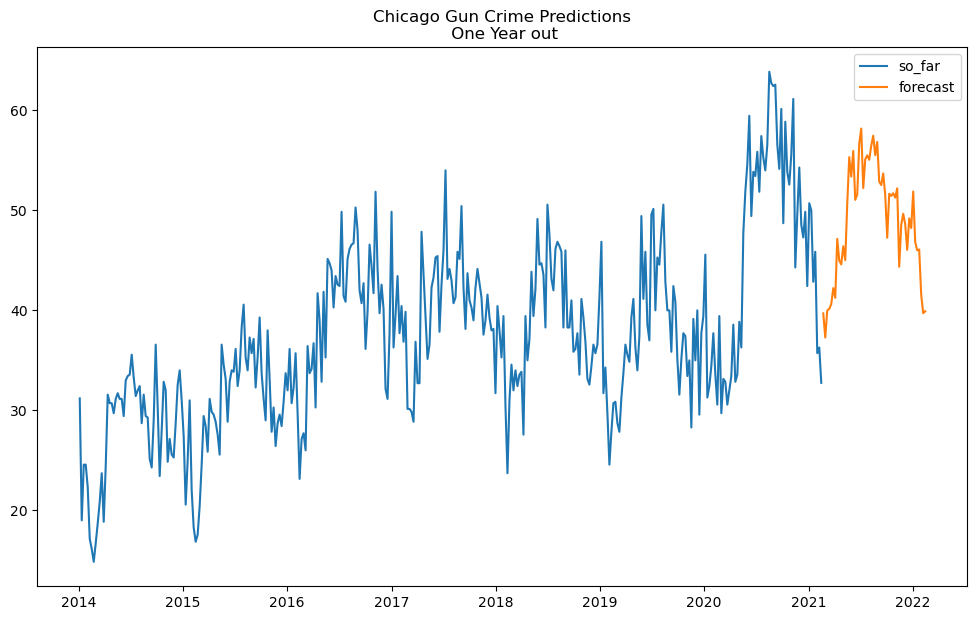

In [76]:
fig, ax = plt.subplots(figsize =(12,7))
ax.plot(ts_weekly, label='so_far')
ax.plot(forecast, label='forecast')
ax.set_title('Chicago Gun Crime Predictions\n One Year out')

plt.legend();